# Wczytanie danych w postaci czasowej

Zrezygnowałem z pobierania danych z COVID API, gdyż niepotrzebne jest odświeżanie danych co kilka minut. Każdy kraj i tak raz dziennie publikuje oficjalne statystyki, więc dane można pobierać wyłącznie ze źródeł "offline".

Na początku dane pobrałem z https://github.com/CSSEGISandData/COVID-19 

In [24]:
import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
r = requests.get(url, allow_redirects=True)
open('time_series.csv', 'wb').write(r.content)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
r = requests.get(url, allow_redirects=True)
open('deaths.csv', 'wb').write(r.content)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
r = requests.get(url, allow_redirects=True)
open('recovered.csv', 'wb').write(r.content)

178831

In [25]:
cases = pd.read_csv("time_series.csv")
deaths = pd.read_csv("deaths.csv")
recovered = pd.read_csv("recovered.csv")
cases.tail()

Province/State         Country/Region        Lat       Long  1/22/20  \
261            NaN  Sao Tome and Principe   0.186400   6.613100        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861000  71.276100        0   
265            NaN                Lesotho -29.610000  28.233600        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/25/20  7/26/20  \
261        0        0        0        0        0  ...      862      863   
262        0        0        0        0        0  ...     1674     1681   
263        0        0        0        0        0  ...      340      354   
264        0        0        0        0        0  ...     7150     7192   
265        0        0        0        0        0  ...      419      505   

     7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  
261      865      867      868      870      871     874     874     874  
262     1691     1703     1711     1726     1728    1730    1734    1734  
263      354      354      378      378      378     386     386     386  
264     7235     7276     7320     7366     7409    7451    7495    7538  
265      505      505      576      604      604     702     718     718  

[5 rows x 199 columns]

In [26]:
deaths.tail()

Province/State         Country/Region        Lat       Long  1/22/20  \
261            NaN  Sao Tome and Principe   0.186400   6.613100        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861000  71.276100        0   
265            NaN                Lesotho -29.610000  28.233600        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/25/20  7/26/20  \
261        0        0        0        0        0  ...       14       14   
262        0        0        0        0        0  ...      474      479   
263        0        0        0        0        0  ...        7        7   
264        0        0        0        0        0  ...       59       59   
265        0        0        0        0        0  ...        9       12   

     7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  
261       14       14       15       15       15      15      15      15  
262      483      484      485      487      493     494     497     499  
263        7        7        7        7        7       7       7       7  
264       60       60       60       60       60      60      61      61  
265       12       12       13       13       13      14      19      19  

[5 rows x 199 columns]

In [27]:
recovered.tail()

Province/State         Country/Region        Lat       Long  1/22/20  \
248            NaN  Sao Tome and Principe   0.186400   6.613100        0   
249            NaN                  Yemen  15.552727  48.516388        0   
250            NaN                Comoros -11.645500  43.333300        0   
251            NaN             Tajikistan  38.861000  71.276100        0   
252            NaN                Lesotho -29.610000  28.233600        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/25/20  7/26/20  \
248        0        0        0        0        0  ...      662      696   
249        0        0        0        0        0  ...      780      797   
250        0        0        0        0        0  ...      324      328   
251        0        0        0        0        0  ...     5906     5970   
252        0        0        0        0        0  ...       69      128   

     7/27/20  7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  
248      734      759      766      771      778     782     787     787  
249      833      840      849      856      862     862     862     863  
250      328      328      330      330      330     330     330     330  
251     6028     6065     6103     6151     6193    6233    6276    6317  
252      128      128      141      144      144     171     173     173  

[5 rows x 199 columns]

Dane powyżej są mniej szczegółowe, dotyczą 265 (w przypadku recovered mniej) regionów i zawierają informacje historyczne z każdego dnia - przydatne do tworzenia wykresów. Bonusem jest fakt, iż codzinennie aktualizowany jest ten sam plik, a nie dodawany nowy, więc wystarczy pobrać z tego samego linku.

# Dane z dziennych raportów

Następnie pobrałem raport dzienny z tego samego źródła danych. Stworzyłem zmienną do przechowywania dzisiejszej (lub wczorajszej, gdyż raporty za dany dzień są wystawiane o północy) daty, żeby nie musieć codziennie wpisywać ręcznie nowej daty do linku.

In [28]:
import datetime

x = datetime.datetime.now()
yesterday = (int)(x.strftime('%d'))-1
if yesterday > 9:
    date_string = (x.strftime("%m-{}-%Y").format(yesterday))
else:
    date_string = (x.strftime("%m-0{}-%Y").format(yesterday))
print(date_string)

08-03-2020


In [29]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
url = url+(date_string)+('.csv')
#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-09-2020.csv'
r = requests.get(url, allow_redirects=True)
open('daily_report.csv', 'wb').write(r.content)
daily = pd.read_csv("daily_report.csv")
daily.tail()

FIPS   Admin2  Province_State Country_Region          Last_Update  \
3930      NaN      NaN             NaN       Zimbabwe  2020-08-04 04:41:59   
3931      NaN      NaN         Unknown       Colombia  2020-07-17 22:34:48   
3932      NaN      NaN  Grand Princess         Canada  2020-07-13 12:34:33   
3933  16061.0    Lewis           Idaho             US  2020-07-10 02:34:22   
3934  41069.0  Wheeler          Oregon             US  2020-07-06 19:33:59   

            Lat       Long_  Confirmed  Deaths  Recovered  Active  \
3930 -19.015438   29.154857       4075      80       1057  2938.0   
3931        NaN         NaN          0       0          0     0.0   
3932        NaN         NaN         13       0         13     0.0   
3933  46.233153 -116.434146          1       0          0     1.0   
3934  44.726982 -120.028143          0       0          0     0.0   

                Combined_Key  Incidence_Rate  Case-Fatality_Ratio  
3930                Zimbabwe       27.417211              1.96319  
3931       Unknown, Colombia             NaN                  NaN  
3932  Grand Princess, Canada             NaN              0.00000  
3933        Lewis, Idaho, US       26.055237              0.00000  
3934     Wheeler, Oregon, US        0.000000                  NaN

Dane powyżej są o wiele bardziej szczegółowe (regiony o wiele mniejsze - na przykład poszczególne stany USA i mniejsze obszary w pańśtwach). Dodatkowo zawarte tu są wskaźniki Incidence rate - zachorowalnosć na 100 tyś. mieszkańców oraz Case-Fatality Ratio - czyli stosunek śmierci do wykrytych przypadków.

Podobne dane znajdziemy pod tym linkiem z European Centre for Disease Prevention and Control: https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-06-09.xlsx

In [30]:
if yesterday > 9:
    date_string = (x.strftime("%Y-%m-{}").format(yesterday))
else:
    date_string = (x.strftime("%Y-%m-0{}").format(yesterday))
print(date_string)
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'
url = url+(date_string)+('.xlsx')
r = requests.get(url, allow_redirects=True)
open('eu_daily_report.xlsx', 'wb').write(r.content)
eu_daily = pd.read_excel("eu_daily_report.xlsx")
eu_daily.tail()

2020-08-03


dateRep  day  month  year  cases  deaths countriesAndTerritories  \
33890 2020-03-25   25      3  2020      0       0                Zimbabwe   
33891 2020-03-24   24      3  2020      0       1                Zimbabwe   
33892 2020-03-23   23      3  2020      0       0                Zimbabwe   
33893 2020-03-22   22      3  2020      1       0                Zimbabwe   
33894 2020-03-21   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
33890    ZW                  ZWE   14645473.0       Africa   
33891    ZW                  ZWE   14645473.0       Africa   
33892    ZW                  ZWE   14645473.0       Africa   
33893    ZW                  ZWE   14645473.0       Africa   
33894    ZW                  ZWE   14645473.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
33890                                                NaN           
33891                                                NaN           
33892                                                NaN           
33893                                                NaN           
33894                                                NaN

Ten plik jest niejako połączeniem tylko dziennych raportów z danymi historycznymi. Zawiera także dane o populacji, co może być przydatne.

# Wizualizacja dla wybranego regionu/kraju

Do przeprowadzenia wizualizacji historycznej skorzystałem z pierwszych danych zaprezentowanych w tym Notebooku. Napisałem funkcję, która jako argument przyjmuje wybrany region i rysuje dla niego wykres przypadków, śmierci i wyzdrowień.

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def draw_historical(region):
    region_data = pd.DataFrame()
    region_data = region_data.append(cases[cases['Country/Region'] == region])
    region_data = region_data.append(deaths[deaths['Country/Region'] == region])
    region_data = region_data.append(recovered[recovered['Country/Region'] == region])
    region_data.reset_index(inplace=True)
    region_data.drop('index', axis = 1, inplace=True)
    region_data["Data type"] = ['Cases', 'Deaths', 'Recovered']
    region_data.set_index("Data type", inplace=True)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8, forward=True)
    
    tmp = region_data[region_data.index == region_data.index[0]]
    ax.plot(tmp.columns[4:], tmp[tmp.columns[4:]].loc['Cases'], 'b',  label='Cases')
    tmp = region_data[region_data.index == region_data.index[1]]
    ax.plot(tmp.columns[4:], tmp[tmp.columns[4:]].loc['Deaths'], 'r',  label='Deaths')
    tmp = region_data[region_data.index == region_data.index[2]]
    ax.plot(tmp.columns[4:], tmp[tmp.columns[4:]].loc['Recovered'], 'g',  label='Recovered')
    
    ax.set(xlabel='Date', title=('Historyczny wykres dla regionu: ')+region)
    ax.grid()
    plt.xticks(range(0, len(tmp.columns[4:]), 4), tmp.columns[4:][::4], rotation = 45) 
    plt.tight_layout()
    plt.legend()
    plt.show()

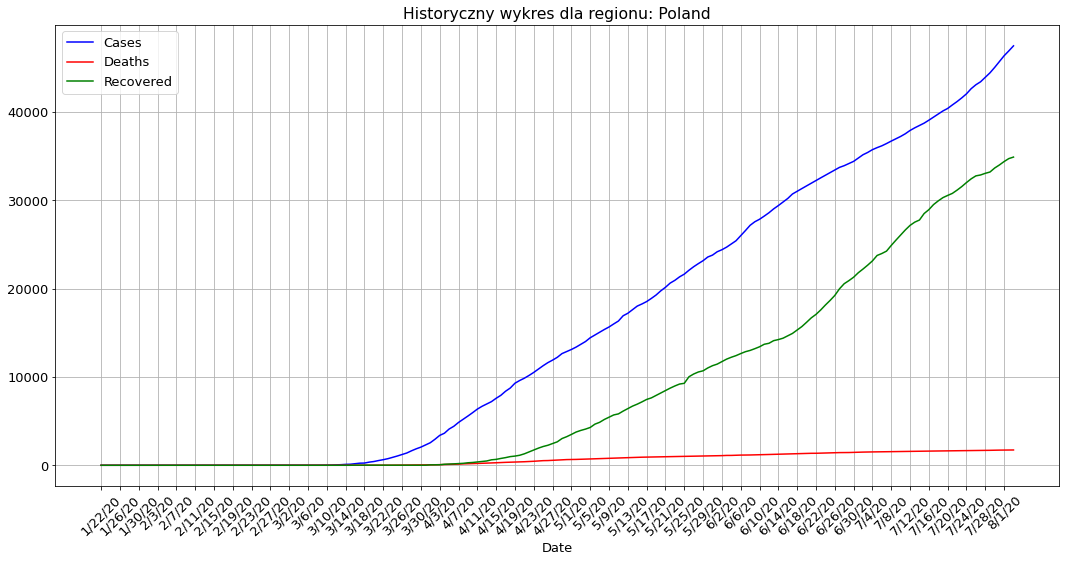

In [38]:
region = 'Poland'
draw_historical(region)

In [39]:
#Lista regionów do wyboru
cases['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

# Mapa zachorowań dla Polski

Tym razem korzystająć z COVID API (ponieważ zawiera nazwy województw) zdecydowałem się narysować mapę zakażeń w Polsce. Współrzędne poprawiłem ręcznie, żeby dobrze wpasowały się na mapę. Wielkość kropki zależy od liczby zachorowań (dzielone przez określoną stałą, w tym wypadku 5).

In [40]:
url = 'https://api.apify.com/v2/key-value-stores/3Po6TV7wTht4vIEid/records/LATEST?disableRedirect=true'
r = requests.get(url, allow_redirects=True)
data = r.json()
data = data['infectedByRegion']
tmp = [0]*16
for i in range(0, len(data)):
    tmp[i] = data[i]['infectedCount']/5
data

[{'region': 'dolnoslaskie', 'infectedCount': 3306, 'deceasedCount': 155},
 {'region': 'kujawsko-pomorskie', 'infectedCount': 819, 'deceasedCount': 50},
 {'region': 'lubelskie', 'infectedCount': 1014, 'deceasedCount': 21},
 {'region': 'lubuskie', 'infectedCount': 432, 'deceasedCount': 10},
 {'region': 'lodzkie', 'infectedCount': 4055, 'deceasedCount': 207},
 {'region': 'malopolskie', 'infectedCount': 3846, 'deceasedCount': 70},
 {'region': 'mazowieckie', 'infectedCount': 6636, 'deceasedCount': 377},
 {'region': 'opolskie', 'infectedCount': 1207, 'deceasedCount': 57},
 {'region': 'podkarpackie', 'infectedCount': 1394, 'deceasedCount': 60},
 {'region': 'podlaskie', 'infectedCount': 998, 'deceasedCount': 22},
 {'region': 'pomorskie', 'infectedCount': 963, 'deceasedCount': 39},
 {'region': 'slaskie', 'infectedCount': 16718, 'deceasedCount': 395},
 {'region': 'swietokrzyskie', 'infectedCount': 985, 'deceasedCount': 45},
 {'region': 'warminsko-mazurskie', 'infectedCount': 385, 'deceasedCount'

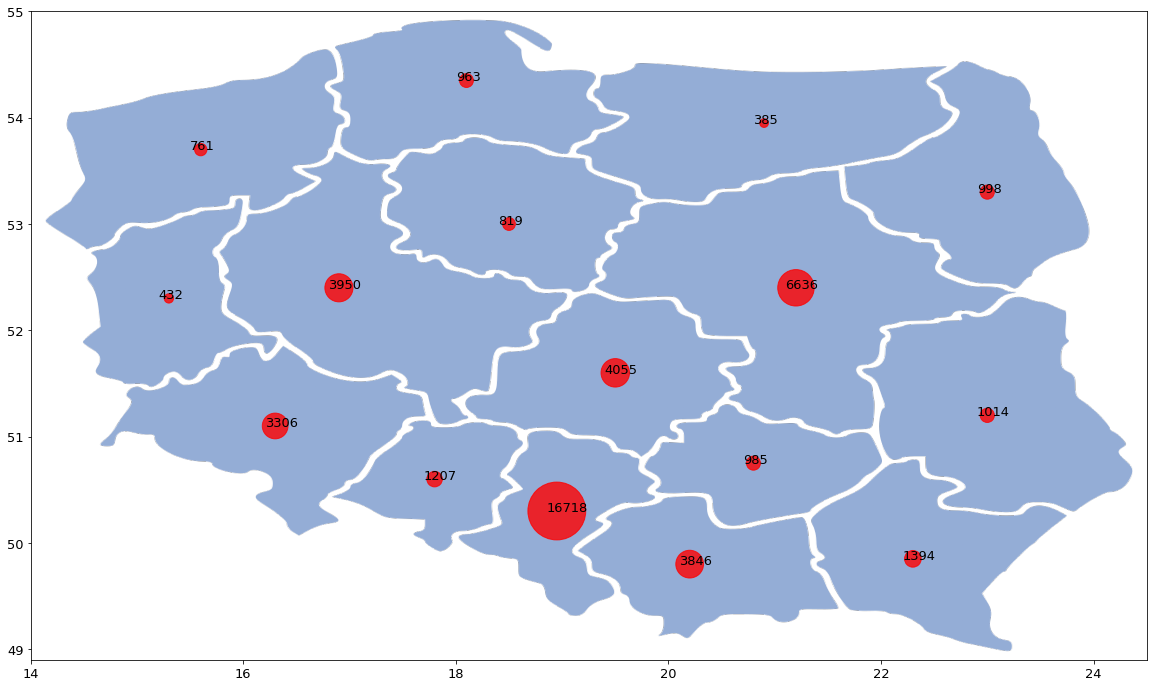

In [41]:
lat_states = [51.1, 53, 51.2, 52.3, 51.6, 49.8, 52.4, 50.6, 49.85, 53.3, 54.35, 50.3, 50.75, 53.95, 52.4, 53.7]
long_states = [16.3, 18.5, 23, 15.3, 19.5, 20.2, 21.2, 17.8, 22.3, 23, 18.1, 18.95, 20.8, 20.9, 16.9, 15.6]
coords = (14, 24.5, 48.9, 55)
map_image = plt.imread('polska_mapa.png')
fig, ax = plt.subplots(figsize = (20, 20))
ax.scatter(long_states, lat_states, alpha= 0.8, s=tmp, c='r')
ax.set_xlim(coords[0], coords[1])
ax.set_ylim(coords[2], coords[3])
for i in range(0, len(data)):
    ax.annotate(data[i]['infectedCount'], (long_states[i]-0.1, lat_states[i]))
ax.imshow(map_image, extent = coords, aspect= 'equal')

# Dane globalne

Postanowiłem także dostać się do danych sumarycznych dla całego świata. W tym celu skorzystałem z danych czasowych - zsumowałem wszystkie wartości śmierci, zachorowań i wyzdrowień (niezależnie od kraju). Następnie wszystkie przerobione dane umieściłem w jednym DataFrame.

In [42]:
tmp = cases.copy()
tmp.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis=1, inplace=True)
global_cases = tmp.sum()

tmp = deaths.copy()
tmp.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis=1, inplace=True)
global_deaths = tmp.sum()

tmp = recovered.copy()
tmp.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis=1, inplace=True)
global_recovered = tmp.sum()

In [43]:
global_data = pd.DataFrame (global_cases, columns = ['total_cases'])
global_data.index.names = ['date']
global_data['new_cases'] = 0
global_data['total_deaths'] = global_deaths
global_data['new_deaths'] = 0
global_data['total_recovered'] = global_recovered
global_data['new_recovered'] = 0
for i in range(len(global_data['total_cases'])):
    if i == 0:
        global_data['new_cases'][i] = global_data['total_cases'][i]
        global_data['new_deaths'][i] = global_data['total_deaths'][i]
        global_data['new_recovered'][i] = global_data['total_recovered'][i]
    else:
        global_data['new_cases'][i] = global_data['total_cases'][i]-global_data['total_cases'][i-1]
        global_data['new_deaths'][i] = global_data['total_deaths'][i]-global_data['total_deaths'][i-1]
        global_data['new_recovered'][i] = global_data['total_recovered'][i]-global_data['total_recovered'][i-1]
global_data.tail()

total_cases  new_cases  total_deaths  new_deaths  total_recovered  \
date                                                                         
7/30/20     17309805     280650        673194        6074         10170650   
7/31/20     17599905     290100        679501        6307         10369140   
8/1/20      17850617     250712        685062        5561         10553585   
8/2/20      18079723     229106        689362        4300         10690555   
8/3/20      18282208     202485        693694        4332         10913000   

         new_recovered  
date                    
7/30/20         222487  
7/31/20         198490  
8/1/20          184445  
8/2/20          136970  
8/3/20          222445

Na podstawie tych danych można stworzyć analogiczny wykres historyczny, tym razem globalny. Analizując strukturę krzywych można także sprawdzić, czy nastąpiło jej wypłaszczenie.

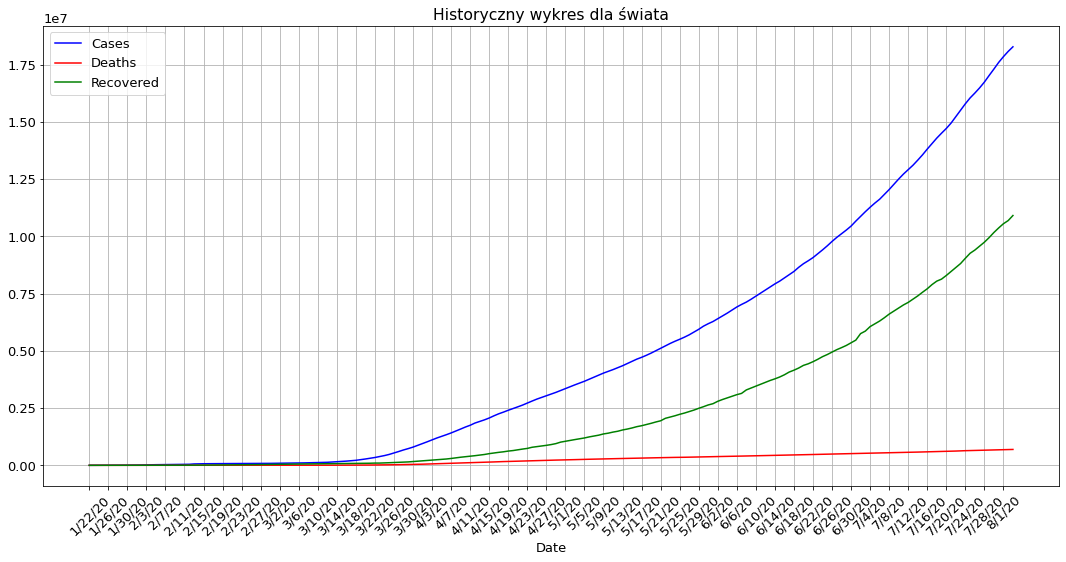

In [44]:
def draw_historical_world():

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8, forward=True)
    
    ax.plot(global_data.index, global_data['total_cases'], 'b',  label='Cases')
    ax.plot(global_data.index, global_data['total_deaths'], 'r',  label='Deaths')
    ax.plot(global_data.index, global_data['total_recovered'], 'g',  label='Recovered')
    
    ax.set(xlabel='Date', title=('Historyczny wykres dla świata'))
    ax.grid()
    plt.xticks(range(0, len(global_data.index), 4), global_data.index[::4], rotation = 45) 
    plt.tight_layout()
    plt.legend()
    plt.show()
           
draw_historical_world()

# Dzienny rozkład zachorowań i śmierci według kontynentu

Dane obejmują dzienny raport z European Centre for Disease Prevention and Control. Dane dotyczą tylko jednego dnia - dane całkowite przedstawiam niżej. Zamieniłem także kolejnością kontynenty, aby lepiej wyklądały na wykresie.

In [45]:
tmp = eu_daily[eu_daily['dateRep']=='2020-06-09']
tmp = tmp.groupby('continentExp')['cases', 'deaths'].sum().reset_index()
b, c = tmp.iloc[0].copy(), tmp.iloc[1].copy()
tmp.iloc[0], tmp.iloc[1] = c,b
b, c = tmp.iloc[3].copy(), tmp.iloc[4].copy()
tmp.iloc[3], tmp.iloc[4] = c,b
tmp

<ipython-input-45-2e0e29b21778>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = tmp.groupby('continentExp')['cases', 'deaths'].sum().reset_index()


continentExp  cases  deaths
0      America  50806    1882
1       Africa   6972     175
2         Asia  32206     703
3      Oceania      7       0
4       Europe  15356     459

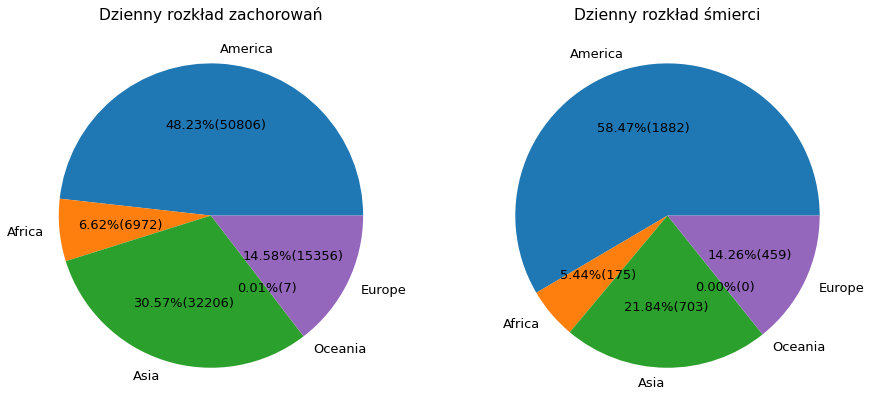

In [46]:
import matplotlib
matplotlib.rcParams['font.size'] = 13.0
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].pie(tmp['cases'], labels = tmp['continentExp'], autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*tmp['cases'].sum()))
axs[0].set_title('Dzienny rozkład zachorowań')
axs[1].pie(tmp['deaths'], labels = tmp['continentExp'], autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*tmp['deaths'].sum()))
axs[1].set_title('Dzienny rozkład śmierci')
plt.show()

# Całkowity historyczny rozkład zachorowań i śmierci według kontynentu

Wykresy są tworzone w ten sam sposób, jedynie należało zsumować poszczególne wartości.

In [47]:
tmp = eu_daily.copy()
tmp = tmp.groupby('continentExp')['cases', 'deaths'].sum().reset_index()
b, c = tmp.iloc[0].copy(), tmp.iloc[1].copy()
tmp.iloc[0], tmp.iloc[1] = c,b
b, c = tmp.iloc[3].copy(), tmp.iloc[4].copy()
tmp.iloc[3], tmp.iloc[4] = c,b
tmp

<ipython-input-47-63c18f5f944f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = tmp.groupby('continentExp')['cases', 'deaths'].sum().reset_index()


continentExp    cases  deaths
0      America  9762672  365688
1       Africa   957830   20271
2         Asia  4382550   98072
3      Oceania    19775     240
4       Europe  2932787  204941
5        Other      696       7

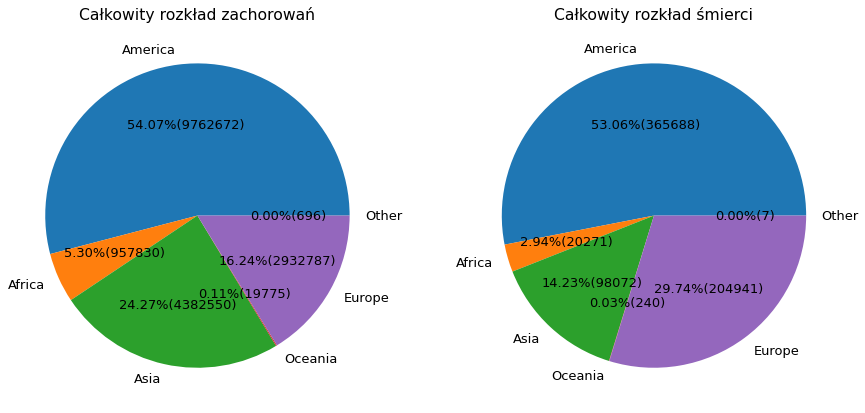

In [48]:
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].pie(tmp['cases'], labels = tmp['continentExp'],
           autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*tmp['cases'].sum()))
axs[0].set_title('Całkowity rozkład zachorowań')
axs[1].pie(tmp['deaths'], labels = tmp['continentExp'],
           autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*tmp['deaths'].sum()))
axs[1].set_title('Całkowity rozkład śmierci')
plt.show()

Co warto zauważyć - Europa odpowiada za około 30% wszystkich zachorowań na świecie i aż za ~44% globalnych śmierci. W Azji natomiast jest odwrotnie - około 20% zachorowań globalnych, a tylko ~9% globalnych śmierci. 

# Historyczna mapa zachorowań dziennych na świecie

Poniżej zwizualizowałem codzienne przypadki zachorowań na świecie. Nie wybrałem sumarycznych zachorowań, ponieważ kropki ciągle by rosły i mapa byłaby nieczytelna. Co prawda przeważająca ilość zachorowań z krajów takich jak USA nadal źle wpływa na odbiór wizualny wykresu, jednak jest to opcja bardziej czytelna.

In [103]:
cases_new = cases.copy()
for i in range(4, len(cases_new.columns)-1):
    cases_new[cases_new.columns[i]] = cases_new[cases_new.columns[i+1]]-cases_new[cases_new.columns[i]]
    for j in range(len(cases_new[cases_new.columns[i]])):
        if cases_new[cases_new.columns[i]][j] < 0:
            cases_new[cases_new.columns[i]][j] = 0
cases_new = cases_new.drop(['6/9/20'], axis=1)
cases_new.head()

<ipython-input-103-c9871ccd74eb>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/25/20  7/26/20  7/27/20  \
0        0        0        0        0  ...      121      106      105   
1        0        0        0        0  ...      126      117      117   
2        0        0        0        0  ...      593      616      642   
3        0        0        0        0  ...        0       10        0   
4        0        0        0        0  ...       16       18       50   

   7/28/20  7/29/20  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  
0      103       71      133       35       0      37   36747  
1      108       92       79      120     123     101    5620  
2      614      602      563      556     515     507   31972  
3       11        4        3        0       0      12     937  
4       78       31       39       16      35      81    1280  

[5 rows x 198 columns]

In [108]:
sadsad = (cases_new[cases_new.columns[4:][i]]/200)
sadsad = [1000 if x > 1000 else x for x in sadsad]
print(sadsad)

[183.735, 28.1, 159.86, 4.685, 6.4, 0.46, 1000, 195.51, 0.565, 19.045, 0.165, 5.425, 2.285, 1.145, 61.675, 3.345, 106.925, 163.42, 3.395, 209.175, 1000, 0.66, 340.83, 351.57, 9.025, 0.515, 409.23, 62.31, 1000, 0.705, 60.795, 5.75, 12.915, 1.2, 86.275, 54.215, 18.205, 0.065, 2.21, 0.85, 1.33, 5.355, 206.955, 0.18, 298.61, 6.795, 23.07, 4.68, 1000, 4.955, 4.665, 2.915, 1.835, 0.835, 8.435, 1.275, 0.735, 0.855, 1.745, 4.735, 6.38, 17.945, 340.69, 5.095, 1.29, 3.29, 4.66, 0.785, 1.275, 0.23, 0.375, 0.09, 1.63, 4.02, 3.75, 1.005, 3.045, 1.025, 0.005, 3.62, 0.955, 6.35, 1000, 17.73, 45.665, 97.01, 81.1, 26.47, 3.56, 13.35, 5.775, 85.04, 1.125, 0.07, 69.98, 26.2, 365.585, 435.205, 473.2, 89.215, 24.105, 1.41, 10.4, 14.19, 96.445, 0.135, 37.33, 39.74, 0.31, 1.36, 15.04, 0.11, 3.335, 0.045, 0.265, 1.345, 1000, 38.23, 2.49, 5.895, 1000, 189.06, 23.685, 257.71, 36.82, 2.37, 37.555, 0.06, 218.97, 22.72, 9.575, 1000, 565.67, 1000, 659.43, 131.04, 372.15, 1000, 4.525, 200.495, 6.09, 469.1, 112.985, 

In [113]:
import plotly.graph_objects as go

frames = []
for i in range(len(cases_new.columns[4:])):
    limit = (cases_new[cases_new.columns[4:][i]]/150)
    limit = [100 if x > 100 else x for x in limit]
    #max size 100 otherwise hard to read
    marker = dict(size=limit)
    frames.append(go.Frame(data = go.Scattergeo(lon = cases_new['Long'], lat = cases_new['Lat'], marker = marker)))
       
fig = go.Figure(
    data = go.Scattergeo(),
    layout=go.Layout(title="Zachorowania na świecie", geo = dict(scope='world'), updatemenus=[
        dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])]),
    frames = frames)
fig.show()

In [ ]:
duzo zrodel - wrzucac tyle, ile sie uda
informacje dzienne
zbadac zrodla - czy nie takie same - pochodzenie danych

In [ ]:
wizualizacja - sposoby